# **Laporan Proyek Machine Learning - Shefiyyah Aurellia Wahyudi**

## **Sistem Rekomendasi Destinasi Wisata Kota Yogyakarta**

## Project Overview

Pengunjung wisata di Kota Yogyakarta terus mengalami peningkatan setiap tahunnya, baik dari wisatawan domestik maupun asing. Hal ini menunjukkan bahwa Daerah Istimewa Yogyakarta merupakan destinasi yang sering dikunjungi oleh para wisatawan untuk berlibur. Provinsi ini memiliki banyak objek wisata yang unik dan menarik, seperti gunung, museum, bukit, pantai, goa, air terjun, budaya, dan tempat bersejarah. Oleh karena itu, pengembangan wisata di kota Yogyakarta perlu dilakukan untuk meningkatkan potensi pariwisata dan pendapatan daerah.[1]

Pariwisata adalah salah satu sektor penting bagi perekonomian Indonesia. Keindahan alam dan keanekaragaman budaya merupakan nilai lebih yang dianggap dapat menarik para wisatawan. Salah satu kota yang terkenal di Indonesia akan tempat wisatanya adalah Yogyakarta. Menurut data statistik kepariwisataan DIY tahun 2017 sebanyak 25.950.793 wisatawan datang ke Yogyakarta. Berbagai jenis objek wisata mulai dari wisata alam hingga wisata keagamaan ada di Yogyakarta, sehingga banyak dikunjungi wisatawan domestik maupun wisatawan mancanegara.[2]<br>

Ketika akan berwisata tentu berbagai hal akan menjadi pertimbangan bagi wisatawan, salah satunya adalah membuat rencana perjalanan. Biasanya wisatawan menggunakan jasa agen wisata atau pramuwisata, namun ada juga wisatawan yang merencanakan sendiri tujuan wisatanya, sehingga memerlukan waktu yang lebih banyak untuk mengumpulkan informasi. Informasi yang begitu banyak kadang sering membuat wisatawan bingung dalam memilih tujuan wisatanya.[2] <br>

Berdasarkan masalah tersebut maka dibutuhkan sebuah sistem yang mampu memberikan rekomendasi tempat wisata. Sistem rekomendasi digunakan karena mampu memberikan penyaringan dari informasi yang sangat banyak (overload) di dunia maya untuk memberikan saran/rekomendasi pilihan objek wisata. Perkembangan jumlah informasi yang banyak di dunia maya menyebabkan sulitnya menemukan informasi yang tepat dan sesuai dengan selera/preferensi yang diinginkan wisatawan.[2]

## Business Understanding

### Problem Statements

### Goals

#### Solution statements

## Data Understanding

Import library yang dibutuhkan:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data dari folder dataset**

- tourism_with_id.csv - mengandung informasi tempak wisata di 5 kota besar di Indonesia (hanya kota Yogyakarta yang dipakai)<br>
- user.csv - mengandung informasi pengguna untuk membuat rekomendasi fitur berdasar pengguna<br>
- tourism_rating.csv - mengandung informasi pengguna, tempat wisata, dan rating untuk membuat sistem rekomendasi berdasar rating

In [2]:
destination_rating = pd.read_csv('dataset/tourism_rating.csv')
destination = pd.read_csv('dataset/tourism_with_id.csv')
user = pd.read_csv('dataset/user.csv')

### **Univariate Exploratory Data Analysis**

### destination_rating


In [3]:
destination_rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


Pada **destination_rating** terdapat:
- terdiri dari 3 kolom yaitu: User_Id, Place_Id, dan Place_Ratings

In [4]:
destination_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


- terdiri dari 10000 input

### destination

In [5]:
destination

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


Pada **destination** terdapat:
- terdiri dari 13 kolom yaitu: Place_Id, Place_Name, Description, Category, City, Price, Rating, Time_Minutes, Coordinate, Lat, Long, Unnamed: 11, dan Unnamed: 12<br>

Dan setelah dilihat bahwa terdapat kolom dengan nama yang tidak jelas seperti  Unnamed: 11, Time_Minutes, dan  Unnamed: 12 dan memiliki nilai yang kosong seperti Unnamed: 11 dan Time_Minutes

In [6]:
destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


- terdiri dari 437 data input

Dan setelah dilihat lagi dari fungsinya kolom Unnamed: 11 dan Unnamed: 12 tidak akan digunakan atau dihapus karena memiliki banyak nilai kosong dan fungsi dari kedua kolom tidak penting

### user

In [7]:
user

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


Pada **user** terdapat:
- terdiri dari 3 kolom yaitu: User_Id, Location, dan Age

In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


- terdiri dari 300 input

In [9]:
print(f"Terdapat {destination['City'].nunique()} Kota Destinasi Wisata")
print('Kota Destinasi   :', destination['City'].unique())

Terdapat 5 Kota Destinasi Wisata
Kota Destinasi   : ['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya']


## Data Preparation

**Menangani missing value dan kolom yang tidak diperlukan pada tabel destination**

Dengan mengetik kode dibawah ini dengan Menghapus kolom Unnamed: 11, Time_Minutes	dan Unnamed: 12 dapat Menangani missing value dan kolom yang tidak diperlukan:

In [10]:
destination = destination.drop(destination[['Unnamed: 11','Unnamed: 12', 'Time_Minutes']], axis=1)
destination

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753


#### Menggabungkan tabel destination dengan destination_rating

In [11]:
merge_destination = pd.merge(destination_rating, destination, how='left', left_on='Place_Id', right_on='Place_Id')
merge_destination


,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,"{'lat': -6.948877, 'lng': 110.3893285}",-6.948877,110.389329
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,"{'lat': -7.264598899999997, 'lng': 110.4046017}",-7.264599,110.404602
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,"{'lat': -7.792189999999999, 'lng': 110.362151}",-7.792190,110.362151
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,"{'lat': -7.247796300000002, 'lng': 112.7998235}",-7.247796,112.799824
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7,"{'lat': -6.204630300000001, 'lng': 106.8365324}",-6.204630,106.836532
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3,"{'lat': -6.829411199999999, 'lng': 107.6874666}",-6.829411,107.687467
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,"{'lat': -6.925963500000001, 'lng': 107.6354278}",-6.925963,107.635428


#### **mengganti merge_destination denga merge_destination yang hanya city di 'Yogyakarta'**

In [12]:
merge_destination = merge_destination[merge_destination['City']=='Yogyakarta']
merge_destination

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,"{'lat': -7.792189999999999, 'lng': 110.362151}",-7.792190,110.362151
8,1,154,2,Pantai Ngrawe (Mesra),Kabupaten Gunungkidul jadi salah satu wilayah ...,Bahari,Yogyakarta,10000,4.5,"{'lat': -8.1333389, 'lng': 110.5537405}",-8.133339,110.553741
10,1,103,3,Tugu Pal Putih Jogja,"Tugu Yogyakarta (Jawa: , Tugu Ngayogyakarta) a...",Taman Hiburan,Yogyakarta,0,4.7,"{'lat': -7.782943699999998, 'lng': 110.3670548}",-7.782944,110.367055
11,1,208,5,Taman Sungai Mudal,"Taman Sungai Mudal, sebuah objek wisata alam t...",Cagar Alam,Yogyakarta,10000,4.6,"{'lat': -7.762813599999998, 'lng': 110.1161626}",-7.762814,110.116163
...,...,...,...,...,...,...,...,...,...,...,...,...
9982,300,107,2,Bangsal Pagelaran,Bangunan utama adalah Bangsal Pagelaran yang d...,Budaya,Yogyakarta,5000,4.6,"{'lat': -7.805284299999999, 'lng': 110.3642137}",-7.805284,110.364214
9987,300,193,5,Candi Sewu,Candi Sewu atau Manjusrighra (Hanacaraka:ꦕꦤ꧀ꦝꦶ...,Budaya,Yogyakarta,50000,4.6,"{'lat': -7.7439217, 'lng': 110.4929095}",-7.743922,110.492909
9993,300,108,5,Embung Tambakboyo,Embung atau waduk Tambakboyo adalah konservasi...,Taman Hiburan,Yogyakarta,0,4.4,"{'lat': -7.756227000000001, 'lng': 110.4150131}",-7.756227,110.415013
9994,300,103,5,Tugu Pal Putih Jogja,"Tugu Yogyakarta (Jawa: , Tugu Ngayogyakarta) a...",Taman Hiburan,Yogyakarta,0,4.7,"{'lat': -7.782943699999998, 'lng': 110.3670548}",-7.782944,110.367055


**Untuk melihat destinasi wisata apa saja yang termasuk kedalam top 10 paling sering dikunjungi dilakukan kode berikut:**

C:\Users\shefi\AppData\Local\Temp\ipykernel_1364\1801739182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Place_Name', data=top_10, palette='viridis')


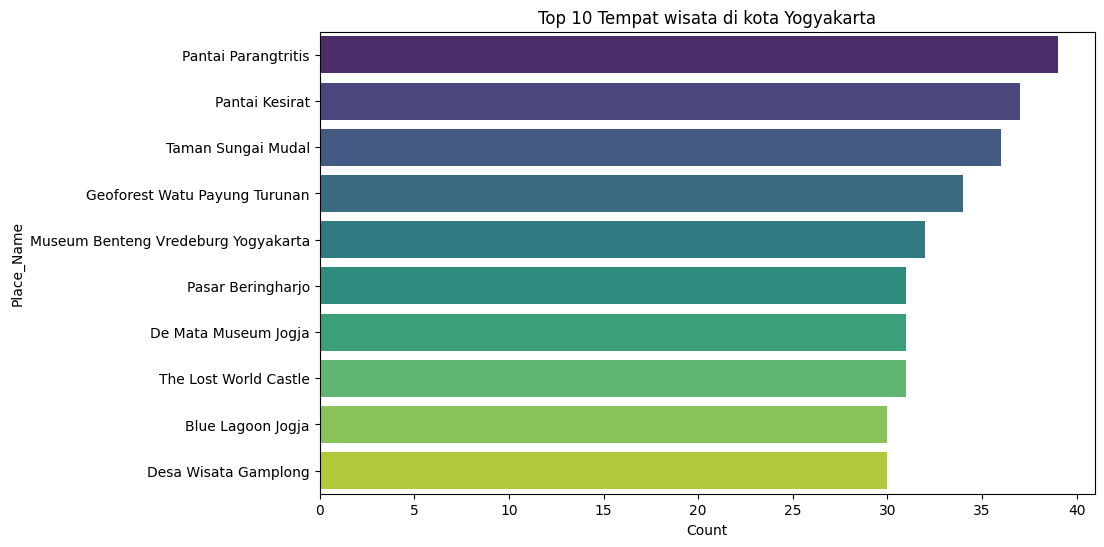

In [13]:
#menghitung jumlah kunjungan pada setiap tempat wisata di kota Yogyakarta dan mengurutkan 10 teratas
top_10 = merge_destination['Place_Name'].value_counts().reset_index(name='Count')[0:10]

# Membuat bar plot horizontal dengan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Place_Name', data=top_10, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Place_Name')
plt.title('Top 10 Tempat wisata di kota Yogyakarta')
plt.show()

**Untuk melihat kategori tempat wisata yang terbanyak sampai yang paling sedikit jumlah pengunjungnya:**

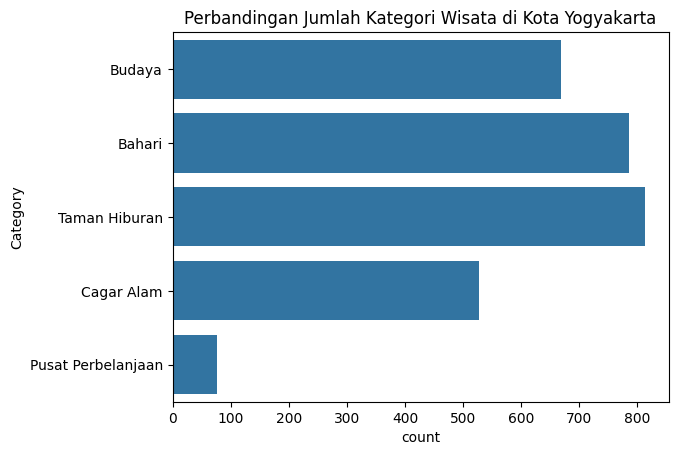

In [14]:
sns.countplot(y='Category', data=merge_destination)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Yogyakarta')
plt.show()

Membuat dictionary untuk data ‘Place_Id’, 'Place_Name’, dan ‘Category’

In [15]:
# Membuat dictionary untuk data ‘Place_Id’, 'Place_Name’, dan ‘Category’
destination_new = pd.DataFrame({
    'id': merge_destination['Place_Id'],
    'Place_Name': merge_destination['Place_Name'],
    'Category': merge_destination['Category']
})
destination_new

,id,Place_Name,Category
0,179,Candi Ratu Boko,Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya
8,154,Pantai Ngrawe (Mesra),Bahari
10,103,Tugu Pal Putih Jogja,Taman Hiburan
11,208,Taman Sungai Mudal,Cagar Alam
...,...,...,...
9982,107,Bangsal Pagelaran,Budaya
9987,193,Candi Sewu,Budaya
9993,108,Embung Tambakboyo,Taman Hiburan
9994,103,Tugu Pal Putih Jogja,Taman Hiburan


Membuang data duplikat pada variabel preparation

In [16]:
# Membuang data duplikat pada variabel preparation
preparation = destination_new.drop_duplicates('id')
preparation

,id,Place_Name,Category
0,179,Candi Ratu Boko,Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya
8,154,Pantai Ngrawe (Mesra),Bahari
10,103,Tugu Pal Putih Jogja,Taman Hiburan
11,208,Taman Sungai Mudal,Cagar Alam
...,...,...,...
1284,87,Sindu Kusuma Edupark (SKE),Taman Hiburan
1323,175,Museum Ullen Sentalu,Budaya
1340,180,Pantai Depok Jogja,Bahari
1432,146,Bukit Wisata Pulepayung,Cagar Alam


## Modeling

## **Model Development dengan Content Based Filtering**

In [17]:
data = preparation
data.sample(5)

,id,Place_Name,Category
890,144,Goa Jomblang,Cagar Alam
87,100,Taman Budaya Yogyakarta,Budaya
312,149,Goa Cerme,Cagar Alam
64,202,Pantai Ngandong,Bahari
1432,146,Bukit Wisata Pulepayung,Cagar Alam


### TF-IDF Vectorizer

Pada tahap ini membangun sistem rekomendasi sederhana berdasarkan jenis kategorinya berdasarkan tempat wisatanya.<br>

Sama seperti proyek sentiment analysis, pada proyek ini menggunakan fungsi tfidfvectorizer() dari library sklearn. Jalankan kode berikut

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tf.fit(data['Category']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out() 

array(['alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'perbelanjaan',
       'pusat', 'taman'], dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks. 

In [19]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['Category']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(126, 8)

matriks yang kita miliki berukuran (2871, 8). Nilai 2871 merupakan ukuran data dan 8 merupakan matrik kategori jenis tempat wisata. <br>

Untuk menghasilkan vektor tf-idf dalam bentuk matriks menggunakan fungsi todense(). Jalankan kode berikut.

In [20]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678]])

### Cosine Similarity

Untuk menghitung derajat kesamaan (similarity degree) antar tempat wisata dengan teknik cosine similarity dengan menggunakan fungsi cosine_similarity dari library sklearn. 

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada tahapan ini, menghitung cosine similarity dataframe tfidf_matrix yang diperoleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, telah berhasil menghitung kesamaan (similarity) antar tempat wisata. Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array. <br>

Selanjutnya,  matriks kesamaan setiap tempat wisata dengan menampilkan nama tempat wisata dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). Jalankan kode berikut.

In [22]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Place_Name'], columns=data['Place_Name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (126, 126)


Place_Name,Puncak Segoro,Pantai Indrayanti,Pantai Ngandong,Watu Lumbung,Candi Borobudur
Place_Name,,,,,
Pantai Sundak,0.0,1.0,1.0,0.0,0.0
Bendung Lepen,0.0,0.0,0.0,0.0,0.0
Kawasan Wisata Sosrowijayan,0.0,0.0,0.0,0.0,0.0
Pasar Kebon Empring Bintaran,0.0,0.0,0.0,0.0,0.0
Bentara Budaya Yogyakarta (BBY),0.0,0.0,0.0,0.0,1.0
Candi Prambanan,0.0,0.0,0.0,0.0,1.0
Pantai Parangtritis,0.0,1.0,1.0,0.0,0.0
Pantai Drini,0.0,1.0,1.0,0.0,0.0
Air Terjun Sri Gethuk,1.0,0.0,0.0,1.0,0.0


### Mendapatkan Rekomendasi

Di sini, membuat fungsi place_recommendations dengan beberapa parameter sebagai berikut:<br>

- Nama_tempat : Nama tempat wisata (index kemiripan dataframe).
- Similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘Place_name’ dan ‘Category’.
- k : Banyak rekomendasi yang ingin diberikan.
-  Sistem ini adalah berupa top-N recommendation. Oleh karena itu, akan memberikan sejumlah rekomendasi tempat wisata pada pengguna yang diatur dalam parameter k. <br>


In [23]:
def place_recommendations(nama_tempat, similarity_data=cosine_sim_df, items=data[['Place_Name', 'Category']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_tempat : tipe data string (str)
                Nama tempat (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_tempat].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_tempat, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Perhatikanlah, dengan menggunakan argpartition, dengan mengambil sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe cosine_sim_df). Kemudian, mengambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini dimasukkan ke dalam variabel closest. Berikutnya, perlu menghapus nama_tempat yang yang dicari agar tidak muncul dalam daftar rekomendasi. Dalam kasus ini, nanti akan mencari nama tempat wisata yang mirip dengan Pantai Kesirat, sehingga perlu drop nama_tempat Pantai Kesirat agar tidak muncul dalam daftar rekomendasi yang diberikan nanti.  <br>

Selanjutnya, untuk menemukan rekomendasi tempat wisata yang mirip dengan Pantai Kesirat. Terapkan kode berikut:

In [24]:
data[data.Place_Name.eq('Pantai Kesirat')]

,id,Place_Name,Category
454,201,Pantai Kesirat,Bahari


In [25]:
# Mendapatkan rekomendasi restoran yang mirip dengan Pantai Kesirat
place_recommendations('Pantai Kesirat')

,Place_Name,Category
0,Pantai Glagah,Bahari
1,Pantai Sundak,Bahari
2,Pantai Siung,Bahari
3,Pantai Kukup,Bahari
4,Pantai Sanglen,Bahari


## **Model Development dengan Collaborative Filtering**

### Data Understanding

impor library

In [26]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Selanjutnya,  lakukan load data di awal dan membaca file **tourism_rating.csv**. Saat itu, membuat variabel destination_rating dan menetapkan data pada variabel tersebut. Untuk memudahkan, ubah nama variabel destination_rating menjadi df.

In [27]:
# Membaca dataset
 
df = destination_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


### Data Preparation

Pada tahap ini, perlu melakukan persiapan data untuk menyandikan (encode) fitur ‘User_Id’ dan ‘Place_Id’ ke dalam indeks integer. Terapkan kode berikut.

In [28]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User_Id'].unique().tolist()
print('list 	User_Id: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded 	User_Id: ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)

list 	User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2

Selanjutnya, lakukan hal yang sama pada fitur ‘placeID’.

In [30]:
# Mengubah placeID menjadi list tanpa nilai yang sama
Place_Id_ids = df['Place_Id'].unique().tolist()
 
# Melakukan proses encoding placeID
Place_Id_to_place_encoded = {x: i for i, x in enumerate(Place_Id_ids)}
 
# Melakukan proses encoding angka ke placeID
Place_Id_encoded_to_place = {i: x for i, x in enumerate(Place_Id_ids)}

Berikutnya, petakan User_Id dan Place_Id ke dataframe yang berkaitan.

In [31]:
# Mapping userID ke dataframe user
df['user'] = df['User_Id'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe tempat wisata
df['tempat_wisata'] = df['Place_Id'].map(Place_Id_to_place_encoded)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah tempat wisata, dan mengubah nilai rating menjadi float.

In [32]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah tempat wisata
num_place = len(Place_Id_encoded_to_place)
print(num_place)
 
# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['Place_Ratings'])
 
# Nilai maksimal rating
max_rating = max(df['Place_Ratings'])
 
print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

300
437
Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


Tahap persiapan telah selesai. Berikut adalah hal-hal yang telah kita lakukan pada tahap ini:<br>

- Memahami data rating yang dimiliki.
- Menyandikan (encode) fitur ‘User_Id’ dan ‘Place_Id’ ke dalam indeks integer. 
- Memetakan ‘User_Id’ dan ‘Place_Id’ ke dataframe yang berkaitan.
- Mengecek beberapa hal dalam data seperti jumlah user, jumlah tempat wisata, kemudian mengubah nilai rating menjadi float.<br>

Tahap persiapan ini penting dilakukan agar data siap digunakan untuk pemodelan. Namun sebelumnya perlu membagi data untuk training dan validasi terlebih dahulu.

Selanjutnya, bagi data train dan validasi dengan komposisi 80:20. Namun sebelumnya perlu memetakan (mapping) data user dan tempat_wisata menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training. 

In [33]:
# Membuat variabel x untuk mencocokkan data user dan tempat wisata menjadi satu value
x = df[['user', 'tempat_wisata']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [299 348]
 [299 290]
 [299 243]] [0.5  0.25 1.   ... 0.5  0.75 0.25]


## **Proses Training**

Pada tahap ini, model menghitung skor kecocokan antara pengguna dan tempat wisata dengan teknik embedding. Pertama, melakukan proses embedding terhadap data user dan tempat wisata. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan tempat wisata. Selain itu, dapat menambahkan bias untuk setiap user dan tempat wisata. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

Di sini, membuat class *RecommenderNet* dengan **keras Model class**. Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs **Keras** dengan beberapa adaptasi sesuai kasus yang sedang diselesaikan. Terapkan kode berikut.

In [34]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.place_embedding = layers.Embedding( # layer embeddings resto
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + place_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses compile terhadap model.

In [160]:
model = RecommenderNet(num_users, num_place, 100) # inisialisasi model

# model compile
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan  Mean Squared Error untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, early_stopping_loss untuk mencari val_loss dan val_root_mean_squared_error terendah, dan root mean squared error (RMSE) sebagai metrics evaluation. <br>

Langkah berikutnya, mulailah proses training. 

In [161]:
# Memulai training
early_stopping_loss = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

early_stopping_rmse = tf.keras.callbacks.EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=16,
    epochs=150,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping_loss, early_stopping_rmse]
)


Epoch 1/150
500/500 [==============================] - 2s 3ms/step - loss: 0.1210 - root_mean_squared_error: 0.3473 - val_loss: 0.1306 - val_root_mean_squared_error: 0.3608
Epoch 2/150
500/500 [==============================] - 1s 2ms/step - loss: 0.1202 - root_mean_squared_error: 0.3461 - val_loss: 0.1292 - val_root_mean_squared_error: 0.3590
Epoch 3/150
500/500 [==============================] - 1s 2ms/step - loss: 0.1196 - root_mean_squared_error: 0.3454 - val_loss: 0.1283 - val_root_mean_squared_error: 0.3577
Epoch 4/150
500/500 [==============================] - 1s 2ms/step - loss: 0.1189 - root_mean_squared_error: 0.3444 - val_loss: 0.1278 - val_root_mean_squared_error: 0.3570
Epoch 5/150
500/500 [==============================] - 1s 2ms/step - loss: 0.1188 - root_mean_squared_error: 0.3441 - val_loss: 0.1275 - val_root_mean_squared_error: 0.3565
Epoch 6/150
500/500 [==============================] - 1s 3ms/step - loss: 0.1183 - root_mean_squared_error: 0.3434 - val_loss: 0.1273 

## Evaluation

### Visualisasi Metrik

Untuk melihat visualisasi proses training, plot metrik evaluasi dengan matplotlib. Terapkan kode berikut.

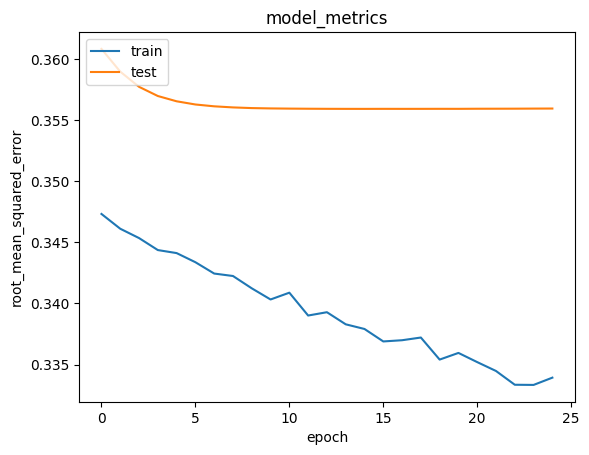

In [162]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

proses training model cukup smooth dan model konvergen pada epochs dengan menggunakan callbacks untuk mencapai 'root_mean_squared_error' dan 'val_root_mean_squared_error' terbaik. Dari proses ini memperoleh nilai error akhir sebesar sekitar 0.3339 dan error pada data validasi sebesar 0.3560. Nilai tersebut cukup bagus untuk sistem rekomendasi.

### Mendapatkan Rekomendasi tempat wisata di Yogyakarta

In [163]:
place_df = preparation
df = pd.read_csv('dataset/tourism_rating.csv')
 
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(Place_Id_to_place_encoded.keys()))
)
 
place_not_visited = [[Place_Id_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

Selanjutnya, untuk memperoleh rekomendasi tempat wisata, gunakan fungsi model.predict() dari library Keras dengan menerapkan kode berikut.

In [165]:
ratings = model.predict(user_place_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    Place_Id_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Menunjukan Rekomendasi untuk id pengguna: {}'.format(user_id))
print('===' * 9)
print('Tempat Wisata di Yogyakarta dengan Rating tertinggi dari Pengguna')
print('----' * 8)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.Place_Name, ':', row.Category)
 
print('----' * 8)
print('Top 10 Rekomendasi Tempat Wisata di Yogyakarta')
print('----' * 8)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.Place_Name, ':', row.Category)

1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 2ms/step
Menunjukan Rekomendasi untuk id pengguna: 27
Tempat Wisata di Yogyakarta dengan Rating tertinggi dari Pengguna
--------------------------------
Tugu Pal Putih Jogja : Taman Hiburan
Jurang Tembelan Kanigoro : Taman Hiburan
Pantai Sundak : Bahari
--------------------------------
Top 10 Rekomendasi Tempat Wisata di Yogyakarta
--------------------------------
Desa Wisata Gamplong : Taman Hiburan
Museum Benteng Vredeburg Yogyakarta : Budaya
Monumen Yogya Kembali : Budaya
Monumen Sanapati : Budaya
Kampung Wisata Taman Sari : Taman Hiburan
Sumur Gumuling : Taman Hiburan
Puncak Gunung Api Purba - Nglanggeran : Cagar Alam
Bukit Bintang Yogyakarta : Taman Hiburan
The World Landmarks - Merapi Park Yogyakarta : Taman Hiburan
Bukit Wisata Pulepayung : Cagar Alam


Berhasil memberikan rekomendasi kepada user. Sebagai contoh, hasil di atas adalah rekomendasi untuk user dengan id 27. Dari output tersebut, kita dapat membandingkan antara Tempat wisata di Yogyakarta dengan rating tertinggi dari pengguna dan Top 10 Rekomendasi Tempat wisata di Yogyakarta dari Pengguna. <br>

Beberapa Tempat wisata rekomendasi di Yogyakarta menyediakan kategori tempat wisata yang sesuai dengan rating user. Pengguna memperoleh 5 rekomendasi tempat wisata di Yogyakarta dengan kategori ‘Category' Taman Hiburam, 3 rekomendasi tempat wisata di Yogyakarta dengan kategori Budaya, dan 2 tempat wisata di Yogyakarta dengan kategori Cagar Alam.<br>

### **Referensi**

[1]	A. Hanafi Ahmad, “Pengaruh Jumlah Kunjungan Wisatawan, Objek Wisata, Dan Retribusi Pariwisata Terhadap Pendapatan Asli Daerah,” J. Sos. Ekon. Bisnis, vol. 2, no. 1, pp. 50–61, 2022, doi: 10.55587/jseb.v2i1.34.<br>

[2]	A. S. N. S. Ningrum, “Content Based Dan Collaborative Filtering Pada Rekomendasi Tujuan Pariwisata Di Daerah Yogyakarta,” Telematika, vol. 16, no. 1, p. 44, 2019, doi: 10.31315/telematika.v16i1.3023.

